In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#Download Adjusted Close Data
def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

In [14]:
#Calculate Daily Returns
def calc_returns(prices):
    return prices.pct_change().dropna()

In [15]:
#Calculate Beta Relative to Benchmark
def calc_betas(returns, benchmark):
    spy_returns = returns[benchmark]
    betas = {}
    for col in returns.columns:
        if col != benchmark:
            beta = returns[col].cov(spy_returns) / spy_returns.var()
            betas[col] = beta
    return betas

In [16]:
#Calculate Portfolio Metrics
def portfolio_metrics(returns, weights_dict, betas, benchmark, risk_free_rate=0.02):
    weights = np.array(list(weights_dict.values()))
    tickers = list(weights_dict.keys())
    
    # Portfolio return & std
    port_ret = (returns[tickers] @ weights).mean() * 252
    port_vol = (returns[tickers] @ weights).std() * np.sqrt(252)

    # Portfolio beta
    port_beta = sum(weights[i] * betas[tickers[i]] for i in range(len(tickers)))

    # Sharpe ratio
    sharpe = (port_ret - risk_free_rate) / port_vol

    return {
        "Annual Return": port_ret,
        "Annual Volatility": port_vol,
        "Sharpe Ratio": sharpe,
        "Portfolio Beta": port_beta
    }

In [17]:
#Simulate Random Portfolios for Efficient Frontier
def simulate_portfolios(returns, benchmark, n=1000, risk_free_rate=0.02):
    results = []
    tickers = [t for t in returns.columns if t != benchmark]

    for _ in range(n):
        weights = np.random.dirichlet(np.ones(len(tickers)))
        port_ret = (returns[tickers] @ weights).mean() * 252
        port_vol = (returns[tickers] @ weights).std() * np.sqrt(252)
        sharpe = (port_ret - risk_free_rate) / port_vol
        results.append({
            "Return": port_ret,
            "Volatility": port_vol,
            "Sharpe": sharpe,
            **{tickers[i]: weights[i] for i in range(len(tickers))}
        })
    
    return pd.DataFrame(results)

In [18]:
#Plot Efficient Frontier
def plot_frontier(df):
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x='Volatility', y='Return', hue='Sharpe', palette='viridis', legend=False)
    plt.title('Efficient Frontier')
    plt.xlabel('Annual Volatility (Risk)')
    plt.ylabel('Expected Annual Return')
    plt.show()

[*********************100%%**********************]  3 of 5 completed

5 Failed downloads:
[*********************100%%**********************]  3 of 5 completed

['AMZN', '^GSPC', 'AAPL', 'TSLA', 'MSFT']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
[**********************80%%************          ]  4 of 5 completed

{'Annual Return': nan, 'Annual Volatility': nan, 'Sharpe Ratio': nan, 'Portfolio Beta': nan}


C:\Users\haiaj\AppData\Local\Temp\ipykernel_23608\3663593786.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Volatility', y='Return', hue='Sharpe', palette='viridis', legend=False)


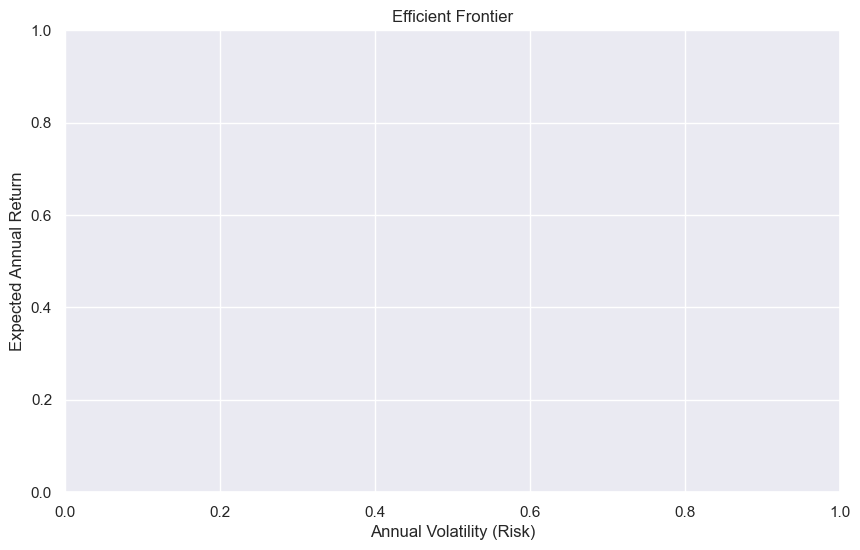

In [19]:
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', '^GSPC']
start = '2023-01-01'
end = '2024-12-31'

prices = fetch_data(tickers, start, end)
returns = calc_returns(prices)
betas = calc_betas(returns, '^GSPC')

weights = {'AAPL': 0.25, 'MSFT': 0.25, 'TSLA': 0.25, 'AMZN': 0.25}
metrics = portfolio_metrics(returns, weights, betas, '^GSPC')
print(metrics)

sim_df = simulate_portfolios(returns, '^GSPC')
plot_frontier(sim_df)

In [20]:
import yfinance as yf
print(yf.__version__)
data = yf.download("AAPL", start="2023-01-01", end="2024-12-31")
print(data.head())

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AAPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


0.2.41
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
